In [2]:
'''
Test code for algorithm of Cai et. al
'''
import math
import operator
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from Code.pr_Modified_networkx_lib import pagerank_scipy as pagerankModified
from networkx import pagerank_scipy as pagerank_scipy
import Code.utilities as my_utilities
import time

In [3]:

# Reads data to G graph. Change gml to read other things
G = nx.read_gml("../Data/footballTSEweb/footballTSEinput.gml")
# Football teams are partitioned into 12 groups (Cai)
#G = nx.karate_club_graph()
# Karate club is partitioned into 2 groups ultimately
#G= nx.read_edgelist("../Data/Stanford_EU_email_core/email-Eu-core.txt",
#                    nodetype=int, create_using=nx.DiGraph())
#G= nx.read_edgelist("../Data/AutonomousSystemsGraphs/as20000102.txt",
#                    nodetype=int, create_using=nx.DiGraph())
vect = [str(x) for x in range(50)]

# Generating a copy of G graph. May be redundant.
G2 = G
pos = nx.spring_layout(G2) # Layout

## Calls page rank for graph without personalization
pr = pagerankModified(G2, max_iter=1000)
##
threshold = 0.6 # Threshold for graph coloring
prList = list(pr.values()) # This stores dict values as a list (Hope so)
print(prList)
# Colormap is a list of RGB A values. Will be used to color the graph depending on the PR value.
# A (alpha does not work ??)
colormap = [(0,1 - (prList[x] * 100)**3,1, (prList[x] * 100)) for x in range(len(pr))]


[0.009623922913885299, 0.00961778820011965, 0.009640383629389572, 0.00962518827887354, 0.008932413509608491, 0.009620383821977723, 0.009637555107137255, 0.009631148393507085, 0.008933042126738566, 0.008935938697409664, 0.008237700352325513, 0.008232019002144604, 0.00823027594364403, 0.008945650681002993, 0.008232556698071906, 0.009638746320930286, 0.008936716210537713, 0.008916105430434921, 0.008923828302853301, 0.008924442549309155, 0.008916618297567768, 0.0089365380814265, 0.00893570292986014, 0.008933739340598835, 0.008228194248233588, 0.008930537281460545, 0.008234108542565663, 0.008916524272969822, 0.007531648003224797, 0.008929408626594342, 0.00892408721135184, 0.008922773542128705, 0.00894763052989231, 0.00823701314761136, 0.008922729950727425, 0.008927142068174649, 0.006845322254149506, 0.00892522330514748, 0.008919253199690837, 0.008943615219908978, 0.008932673311642266, 0.008246276171452587, 0.006152073002284106, 0.0089237618197359, 0.008922193141496965, 0.0089276103644517, 0

/home/egebasturk/anaconda3/envs/PageRank/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


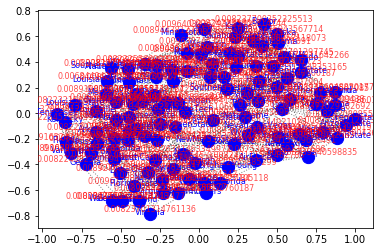

In [4]:

# Following draws graph nodes, labels and edges separately
nx.draw_networkx_nodes(G2, pos=pos, node_size=150, node_color='b')
# Pos_higher and related calculations are used to draw PR values above nodes.
pos_higher = {}
y_off = 0.02  # offset on the y axis

for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G2, pos=pos_higher, font_size=8, font_color='b')
nx.draw_networkx_edges(G2, pos=pos, style='dotted', alpha=0.5)
pos_higher2 = {}

for k, v in pos.items():
    pos_higher2[k] = (v[0], v[1]+y_off*2)
nx.draw_networkx_labels(G2, pos=pos_higher2, alpha=0.7, font_color='r', labels=pr, font_size=8)
plt.show() # display subgraph


In [5]:

## Test code to run pagerank on each node with personalization
## Dummy
prS = []
counter = 0
for i in G2.nodes():
    prS.append(pagerank_scipy(G2, personalization={i:1}, max_iter=1000))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
## Dummy

prS = []
counter = 0

start_time_of_standard_PR = time.clock()
for i in G2.nodes():
    prS.append(pagerank_scipy(G2, personalization={i:1}, max_iter=1000))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
end_time_of_standard_PR = time.clock()
print("Std elapsed time = " + str(end_time_of_standard_PR - start_time_of_standard_PR))


prS_modified = []
counter = 0

start_time_of_modified_PR = time.clock()
for i in G2.nodes():
    prS_modified.append(pagerankModified(G2, personalization={i:1}, max_iter=1000))
    # Comment in to see the max for each personalization
    #print(i + ":\t\t"+ max(prS_modified[counter].items(), key=operator.itemgetter(1))[0])
    counter += 1
end_time_of_modified_PR = time.clock()

time_of_PR_M = end_time_of_modified_PR - start_time_of_modified_PR
time_of_PR   = end_time_of_standard_PR - start_time_of_standard_PR
print("Modified elapsed time = " + str(end_time_of_modified_PR - start_time_of_modified_PR))
## Get medians
# Using Sorted representation of the pr dict to get items around median according ot PR values
# I don't know if this is a good choice
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1))
tmp_mid =  int(math.floor(len(sorted_pr)/2))
five_nodes = [sorted_pr[tmp_mid], sorted_pr[tmp_mid + 1], sorted_pr[tmp_mid + 2], sorted_pr[tmp_mid-1], sorted_pr[tmp_mid - 2]]
print(five_nodes)


Std elapsed time = 0.7836679999999996


Modified elapsed time = 0.5301230000000006
[('Temple', 0.008925206219280177), ('GeorgiaTech', 0.00892522330514748), ('Maryland', 0.00892601951413477), ('VirginiaTech', 0.008924442549309155), ('WestVirginia', 0.00892408721135184)]


In [6]:

# Following should run PR personalized at each of the chosen nodes
prS5 = [] # Clean previous list
counter = 0
for i in five_nodes:
    prS5.append(pagerankModified(G2, personalization={i[0]:1}, max_iter=1000))
    print(str(i[0]) + ":\t\t" + str(max(prS5[counter].items(), key=operator.itemgetter(1))[0]))
    counter += 1


Temple:		Temple
GeorgiaTech:		GeorgiaTech
Maryland:		Maryland
VirginiaTech:		VirginiaTech
WestVirginia:		WestVirginia


In [7]:
# Not working skip to next part for now
#TODO: Check this; https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
# It shows a tutorial on karate club dataset, which I think was also in the paper
# It explains clustering part.
#edge_matrix = my_utilities.graph_to_edge_matrix(G2) # TODO: IndexError. Need to fix the function.
#from sklearn import cluster
#k_clusters = 2
#k_means_result = cluster.KMeans(n_clusters=k_clusters, n_init=200).fit(edge_matrix)

#print(k_means_result)


In [8]:
#print(prS_modified[0])
sim_threshold = 0.01
start_time = time.clock()
for i in prS_modified:
    for p in list(i.keys()):
        if i[p] < sim_threshold:
            del i[p]
end_time = time.clock()
time_of_PR_M += end_time - start_time

start_time = time.clock()
#print(prS_modified[0])
for i in prS:
    for p in list(i.keys()):
        if i[p] < sim_threshold:
            del i[p]
end_time = time.clock()
time_of_PR += end_time - start_time

Merge Clusters according the result of Following Formula
$$ {C_i \cap C_j}\over{\min{(C_i, C_j)}}$$


In [9]:
cluster_merge_threshold = 0.4

start_time = time.clock()
tmp = len(prS_modified)
i = 0
while i < tmp:
    p = i
    while p < tmp:
        if (len(prS_modified[i].keys() & prS_modified[p].keys())
                / min(len(prS_modified[i]), len(prS_modified[p])) > cluster_merge_threshold):
            prS_modified[i].update(prS_modified[p])
            del prS_modified[p]
            tmp = tmp - 1
        p = p + 1
    i = i + 1
end_time = time.clock()
time_of_PR_M += end_time - start_time

print(prS_modified[0])
print(len(prS_modified))

start_time = time.clock()
tmp = len(prS)
i = 0
while i < tmp:
    p = i
    while p < tmp:
        if (len(prS[i].keys() & prS[p].keys())
                / min(len(prS[i]), len(prS[p])) > cluster_merge_threshold):
            prS[i].update(prS[p])
            del prS[p]
            tmp = tmp - 1
        p = p + 1
    i = i + 1
end_time = time.clock()
time_of_PR += end_time - start_time

{'BrighamYoung': 0.010185187956901721, 'FloridaState': 0.05543230997642435, 'VirginiaTech': 0.012941175733355379, 'NorthCarolinaState': 0.05388459104757335, 'Florida': 0.030433784971670756, 'Virginia': 0.05397216365561185, 'GeorgiaTech': 0.05467840297052866, 'Duke': 0.05448354263795697, 'Louisville': 0.011653498612945262, 'Vanderbilt': 0.02958391177988202, 'Navy': 0.013200120765035482, 'NorthCarolina': 0.054306846765644845, 'MiamiFlorida': 0.011479021976305195, 'Clemson': 0.053375460439870626, 'WakeForest': 0.05411432525904485, 'Maryland': 0.19279711215902082, 'Akron': 0.049854899566285235, 'BostonCollege': 0.052915926187790924, 'WestVirginia': 0.027230866704807424, 'BowlingGreenState': 0.011943449949033808, 'Buffalo': 0.01252540367474683, 'Syracuse': 0.05224735426011993, 'CentralFlorida': 0.01154436536802107, 'EasternMichigan': 0.023824270479736512, 'EastCarolina': 0.015236799554876827, 'Pittsburgh': 0.01185830037522732, 'Temple': 0.027540159211422964, 'NotreDame': 0.01582635159343677

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm
#print(cm.cmap_d.keys())

colormap = plt.cm.get_cmap('RdYlBu')
norm = plt.Normalize(vmin=0, vmax=max(len(prS_modified), len(prS)))
print(colormap)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


10


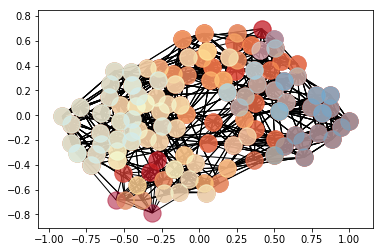

In [11]:
print(len(prS_modified))
for i in range(len(prS_modified)):
    #colormap[i] = [colormap[i] for x in range(len(prS_modified))]
    clusteri = nx.Graph(G2.subgraph(prS_modified[i]))
    nx.draw_networkx_nodes(clusteri, pos=pos,
                           cmap=colormap(norm(i)),
                           node_color=colormap(norm(i)), alpha=0.5)
    nx.draw_networkx_edges(clusteri, pos=pos)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


11


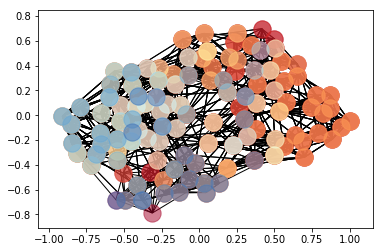

In [12]:
print(len(prS))
for i in range(len(prS)):
    clusteri = nx.Graph(G2.subgraph(prS[i]))
    nx.draw_networkx_nodes(clusteri, pos=pos,
                           cmap=colormap(norm(i)),
                           node_color=colormap(norm(i)), alpha=0.5)
    nx.draw_networkx_edges(clusteri, pos=pos)


In [13]:
import networkx.algorithms.cuts as cuts
import networkx.algorithms.community as community

# Generally, the lower value of
# conductance the better quality the cluster is (Cai 2011).
conductance_list_M = []
part_set_M         = []
for i in range(len(prS_modified)):
    p = i
    while p < len(prS_modified):
        conductance_list_M.append(
            cuts.conductance(G2, prS_modified[i],
                             prS_modified[p]))
        p += 1
conductance_list = []

for i in range(len(prS)):
    p = i + 1
    while p < len(prS):
        conductance_list.append(
            cuts.conductance(G2, prS[i],
                             prS[p]))
        p += 1

print(sum(conductance_list_M))
print(sum(conductance_list))

20.724564040954462
21.163324326560932


7.000000000090267e-06
0.5344520000000008
0.7876339999999997


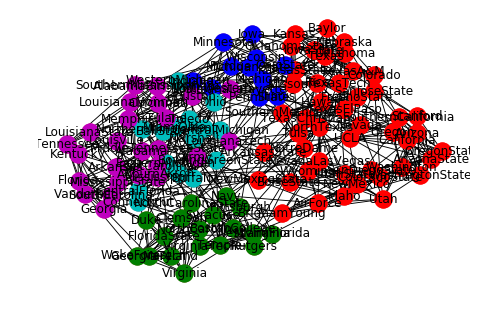

In [14]:
def draw_community(g, position):
    start_time = time.clock()
    communities_generator = community.girvan_newman(g)
    end_time   = time.clock()
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    next_level_communities2 = next(communities_generator)
    next_level_communities3 = next(communities_generator)
    #position = nx.spring_layout(g)  # calculate position for each node
    # pos is needed because we are going to draw a few nodes at a time,
    # pos fixes their positions.
    nx.draw(g, position, edge_color='k', with_labels=True,
            font_weight='light', node_size=280, width=0.9)
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    
    #for c in top_level_communities:
     #   nx.draw_networkx_nodes(g, position, nodelist=list(c), node_color=colors[index])
      #  index += 1
    index = 0
    for c in next_level_communities3:
         nx.draw_networkx_nodes(g, position, nodelist=list(c), node_color=colors[index])
         index += 1
    #plt.show()
    print(end_time-start_time)
draw_community(G2, pos)
print(time_of_PR_M)
print(time_of_PR)